[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a: Brand of car
b: Height
c: A dice roll
d: Speed of a car

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

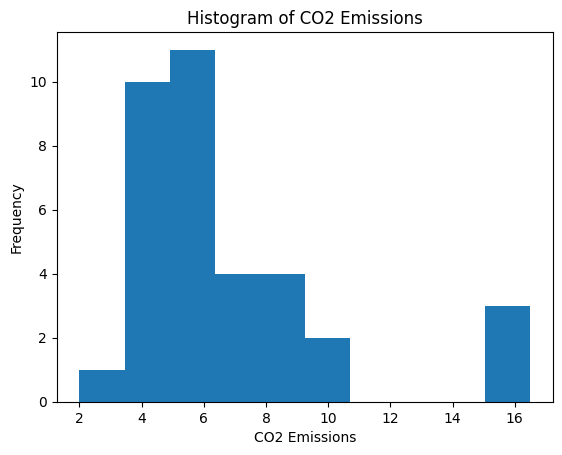

In [35]:
plt.hist(carbon_west['CO2'])
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.title("Histogram of CO2 Emissions")
plt.show()

Part b. Find the mean, median, and standard deviation.

In [7]:
carbon_west['CO2'].agg(['mean', 'median', 'std'])

,CO2
mean,6.717143
median,5.900000
std,3.356949


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [9]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [14]:
murders_no_dc = murders[murders['state'] != 'DC']

murders_no_dc['murder'].agg(['mean', 'std'])

,murder
mean,4.874000
std,2.586291


Part b. Find the five-number  summary without D.C.

In [15]:
murders_no_dc['murder'].describe()[['min', '25%', '50%', '75%', 'max']]


,murder
min,1.000
25%,2.625
50%,4.850
75%,6.175
max,12.400


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [18]:
murders['murder'].agg(['mean', 'std'])

,murder
mean,5.252941
std,3.725391


In [19]:
murders['murder'].describe()[['min', '25%', '50%', '75%', 'max']]

,murder
min,1.00
25%,2.65
50%,5.00
75%,6.45
max,24.20


The mean changed from 4.874000 (without DC) to 5.252941 (With DC) and the median, or the 50% quartile, went from 4.850 (without DC) to 5.00 (with DC). The mean changed by 0.378941 or 7.77%. The median changed by .15 or 3.093%. Therefore, the mean changed more than the median when we included DC. The full range changed drastically from 1.00-12.40 to 1.00-24.20 this is much more significant than the change of the inner quartile range from 2.625-6.175 to 2.65-6.45.

Answer:
Mean and full range.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [20]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

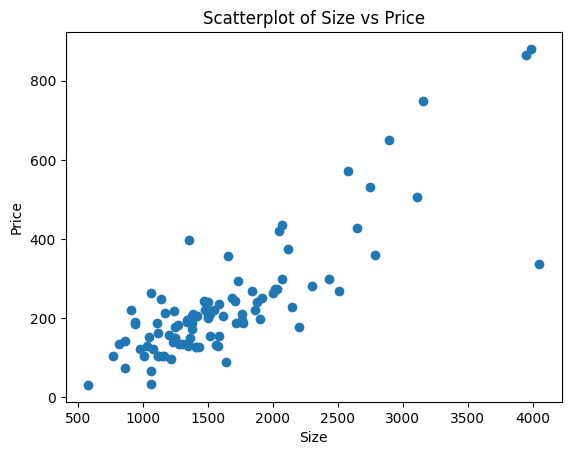

In [36]:
plt.scatter(houses['size'], houses['price'])
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Scatterplot of Size vs Price")
plt.show()

Part b. Find the correlation between the two variables.

In [37]:
print(f"correlation of size and price = {houses['size'].corr(houses['price'])}")

correlation of size and price = 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

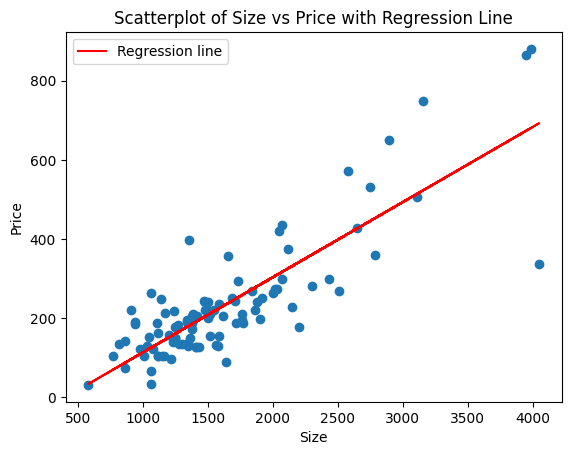

In [39]:
plt.scatter(houses['size'], houses['price'])
m, b = np.polyfit(houses['size'], houses['price'], 1)

plt.plot(houses['size'], m*houses['size'] + b, color="red", label="Regression line")
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Scatterplot of Size vs Price with Regression Line")
plt.legend()

plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

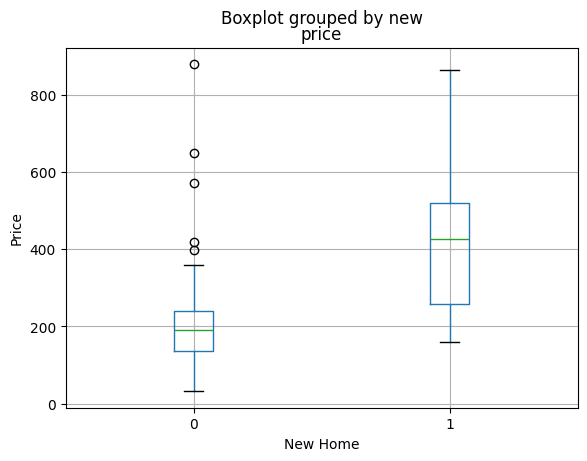

The box plot on the right denoted by 1 is if the house is labeled as new.
The plot on the left denoted by 0 is a house that is not new


In [40]:
houses.boxplot(column='price', by='new')

plt.xlabel("New Home")
plt.ylabel("Price")
plt.show()

print("The box plot on the right denoted by 1 is if the house is labeled as new.")
print("The plot on the left denoted by 0 is a house that is not new")

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

As size increases price increases as well. We can tell from the strong positive correlation between size and price and the positive slope on the regression line on the scatter plot.

Price also increases if the house is new. We can see from the box plots that the one on the right representing new homes has a significantly higher price points.

Answer:
Price has a positive correlation to house size and whether the house is new.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [42]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat",sep=r'\s+')

In [46]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
